# Comunicaciones Digitales
Sofía Amallo - 41279731

### Consigna: 
Realizar un sistema de comunicación con modulación QPSK y 8PSK, filtros TX y RX raiz de coseno realzados y canal AWGN. Parámetros de desempeño a mostrar son: diagrama ojo y diagrama de constelación. Parámetros a emplear son: span del filtro, muestras por símbolos (SPS), SNRdB

![diagramadebloque](https://github.com/sofia-am/comunicaciones-digitales/blob/master/img/urn%20cambridge.org%20id%20binary%2020170621045003030-0413%209781316335444%2011473fig1_1.png?raw=true)


## Phase Shift Keying:
Es una forma de modulación angular que consiste en hacer variar la fase de la portadora entre un número determinado de valores discretos. La diferencia con la modulación de fase convencional (PM) es que mientras en esta la variación de fase es continua, en función de la señal moduladora, en la PSK la señal moduladora es una señal digital y, por tanto, con un número de estados limitado.
Para su transmisión flujo binario es dividido dos componentes, denominados canales I (inphase, en fase) y Q (quadrature, en cuadratura) que modulan independientemente a dos portadoras ortogonales entre sí. Después, las dos señales se superponen, y la señal resultante es la señal QPSK.  [1]

![transmisiónqpsk](https://github.com/sofia-am/comunicaciones-digitales/blob/master/img/qpsk_transmitter.png?raw=true)

### QPSK (Quadrature Phase-Shift Keying)
En QPSK se usan dos bits para formar cada símbolo. La salida del modulador es la portadora con una fase de entre cuatro posibles valores durante el tiempo de duración de símbolo.

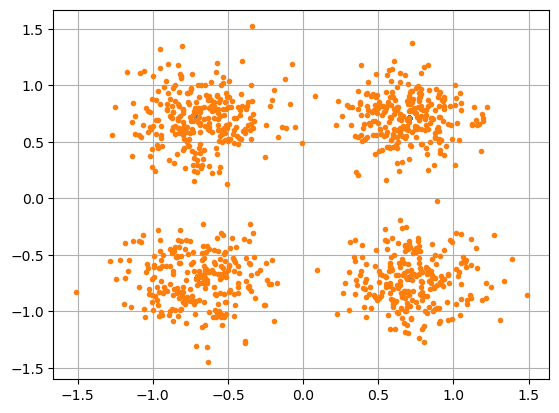

In [1]:
import numpy as np
import matplotlib.pyplot as plt

cant_simbolos = 1000

data_array = np.random.randint(0, 4, cant_simbolos) #genero un array de valores aleatorios entre 0 y 3
data_grados = data_array*360/4.0 + 45 # 45, 135 255, 315 grados
data_radianes = data_grados*np.pi/180.0
data_simbolos = np.cos(data_radianes) + 1j*np.sin(data_radianes)

ruido = (np.random.randn(cant_simbolos) + 1j*np.random.randn(cant_simbolos))/np.sqrt(2) #randn me devuelve un conjunto de datos con distribución normal
potencia_ruido = 0.1

r = data_simbolos + ruido*np.sqrt(potencia_ruido)

#print('Simbolos: %d',data_simbolos)

plt.plot(np.real(data_simbolos), np.imag(data_simbolos), '.')
plt.plot(np.real(r), np.imag(r), '.')
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

SIZE = 100
fc = 10000
over_sample = 4

bits = np.random.randint(0, 2, SIZE)
lst = [0]*SIZE 
nrz_bits = np.array(lst)

for index, bit in enumerate(bits):
    #nrz_bits[index] = 1 if bit else nrz_bits[index] = -1 #if True 1 -> 1, 0 -> -1
    #print(index, bit)
    if bit: nrz_bits[index] = 1
    else: nrz_bits[index] = -1

inphase_stream = nrz_bits[0::2] #pares
quadrature_stream = nrz_bits[1::2] #impares

sampling_freq = fc*4

t = np.arange(0, len(inphase_stream)/sampling_freq, 1/sampling_freq)

i_t = inphase_stream*(np.cos(2*np.pi*t*fc))
q_t = quadrature_stream*(np.sin(2*np.pi*t*fc))

s_t = i_t - q_t


plt.plot(t, s_t)
plt.show()
print(s_t)


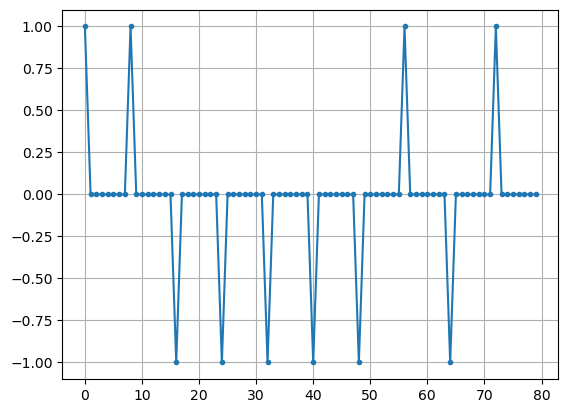

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

cant_simbolos = 10
sps = 8 # sample per symbol

bits = np.random.randint(0, 2, cant_simbolos) # Our data to be transmitted, 1's and 0's

x = np.array([])
for bit in bits:
    pulse = np.zeros(sps)
    pulse[0] = bit*2-1 # set the first value to either a 1 or -1
    x = np.concatenate((x, pulse)) # add the 8 samples to the signal
    
plt.figure(0)
plt.plot(x, '.-')
plt.grid(True)
plt.show()

### Referencias

- [1]: https://es.wikipedia.org/wiki/Modulaci%C3%B3n_por_desplazamiento_de_fase
